# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Difference between array and dataframe

In [2]:
x=[0,10,20,30,40,50,60] #initilize the data
x_arr=np.array(x)
x_arr


array([ 0, 10, 20, 30, 40, 50, 60])

In [3]:
x_ser=pd.Series(x) # A Pandas series is like a column in a table
x_ser #The values are labeled with thier index number i.e. first value has index 0 and so on.

0     0
1    10
2    20
3    30
4    40
5    50
6    60
dtype: int64

In [4]:
# One can add label using index arguments like
x_ser=pd.Series(x, index=['I','II','III','IV','V','VI','VII'])
x_ser

I       0
II     10
III    20
IV     30
V      40
VI     50
VII    60
dtype: int64

In [5]:
x_ser['V']

40

#Create a dataframe

In [6]:
df=pd.DataFrame(
    {
        "Name":["Tom","Jerry","Sam"],
     "Age":[2,5,8],
     "Color":["Black","White","Brown"]     
    }
)

##Print Full Dataframe

In [7]:
df

,Name,Age,Color
0,Tom,2,Black
1,Jerry,5,White
2,Sam,8,Brown


## Print the selected Column

In [8]:
df['Age']

0    2
1    5
2    8
Name: Age, dtype: int64

In [9]:
df['Color']

0    Black
1    White
2    Brown
Name: Color, dtype: object

In [10]:
df['Age'].max()

8

## A quick overview of the numerical data

In [11]:
df.describe()

,Age
count,3.0
mean,5.0
std,3.0
min,2.0
25%,3.5
50%,5.0
75%,6.5
max,8.0


#Covid Data: Extracted from Worldometer

In [12]:
df_covid=pd.read_csv("https://raw.githubusercontent.com/darshanbeniwal/Statistical_Cosmology_using_Python_ICARD_2021/main/Week_9_Feb_01_2022/Covid_19_Jan_16_2022.csv")

In [13]:
df_covid

,Sr. No.,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Tot Cases_per_1M pop,Deaths_per_1M pop,Total_Tests,Tests_per_1M pop,Population
0,0,World,326673326,5553522.0,266411376.0,54708428.0,41909.0,713.0,NaN,NaN,NaN
1,1,USA,66664283,873149.0,43059089.0,22732045.0,199601.0,2614.0,857726168.0,2568137.0,3.339877e+08
2,2,India,37122164,486094.0,35085721.0,1550349.0,26499.0,347.0,700712824.0,500200.0,1.400865e+09
3,3,Brazil,22975723,621007.0,21710831.0,643885.0,106922.0,2890.0,63776166.0,296795.0,2.148830e+08
4,4,UK,15146356,151899.0,11299374.0,3695083.0,221326.0,2220.0,430233640.0,6286799.0,6.843446e+07
...,...,...,...,...,...,...,...,...,...,...,...
220,220,Marshall Islands,7,NaN,4.0,3.0,117.0,NaN,NaN,NaN,5.980400e+04
221,221,Samoa,3,NaN,3.0,0.0,15.0,NaN,NaN,NaN,2.004420e+05
222,222,Saint Helena,2,NaN,2.0,0.0,328.0,NaN,NaN,NaN,6.105000e+03
223,223,Micronesia,1,NaN,1.0,0.0,9.0,NaN,NaN,NaN,1.168770e+05


### Type of each column

In [14]:
df_covid.dtypes #DataFrame are integers (int64), floats (float64) and strings (object).

Sr. No.                   int64
Country                  object
Total_Cases               int64
Total_Deaths            float64
Total_Recovered         float64
Active_Cases            float64
Tot Cases_per_1M pop    float64
Deaths_per_1M pop       float64
Total_Tests             float64
Tests_per_1M pop        float64
Population              float64
dtype: object

### Select the specific rows

In [15]:
df_covid.head(5) #I want to see the first 5 rows of a pandas DataFrame.

,Sr. No.,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Tot Cases_per_1M pop,Deaths_per_1M pop,Total_Tests,Tests_per_1M pop,Population
0,0,World,326673326,5553522.0,266411376.0,54708428.0,41909.0,713.0,NaN,NaN,NaN
1,1,USA,66664283,873149.0,43059089.0,22732045.0,199601.0,2614.0,857726168.0,2568137.0,3.339877e+08
2,2,India,37122164,486094.0,35085721.0,1550349.0,26499.0,347.0,700712824.0,500200.0,1.400865e+09
3,3,Brazil,22975723,621007.0,21710831.0,643885.0,106922.0,2890.0,63776166.0,296795.0,2.148830e+08
4,4,UK,15146356,151899.0,11299374.0,3695083.0,221326.0,2220.0,430233640.0,6286799.0,6.843446e+07


In [16]:
df_covid.tail(5) #I want to see the last 5 rows of a pandas DataFrame.

,Sr. No.,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Tot Cases_per_1M pop,Deaths_per_1M pop,Total_Tests,Tests_per_1M pop,Population
220,220,Marshall Islands,7,NaN,4.0,3.0,117.0,NaN,NaN,NaN,59804.0
221,221,Samoa,3,NaN,3.0,0.0,15.0,NaN,NaN,NaN,200442.0
222,222,Saint Helena,2,NaN,2.0,0.0,328.0,NaN,NaN,NaN,6105.0
223,223,Micronesia,1,NaN,1.0,0.0,9.0,NaN,NaN,NaN,116877.0
224,224,Tonga,1,NaN,1.0,0.0,9.0,NaN,NaN,NaN,107537.0


In [17]:
df=df_covid['Total_Cases']
df
# dff=df.fillna(0)

0      326673326
1       66664283
2       37122164
3       22975723
4       15146356
         ...    
220            7
221            3
222            2
223            1
224            1
Name: Total_Cases, Length: 225, dtype: int64

In [18]:
df_covid['Total_Cases']

0      326673326
1       66664283
2       37122164
3       22975723
4       15146356
         ...    
220            7
221            3
222            2
223            1
224            1
Name: Total_Cases, Length: 225, dtype: int64

In [19]:
'''
I’m interested in the Country and Total Cases of the Covid-19
To select multiple columns, use a list of column names within the selection brackets [].
'''
df_covid[['Country','Total_Cases']]

,Country,Total_Cases
0,World,326673326
1,USA,66664283
2,India,37122164
3,Brazil,22975723
4,UK,15146356
...,...,...
220,Marshall Islands,7
221,Samoa,3
222,Saint Helena,2
223,Micronesia,1


In [20]:
df_covid[['Country','Total_Cases']].head(5)

,Country,Total_Cases
0,World,326673326
1,USA,66664283
2,India,37122164
3,Brazil,22975723
4,UK,15146356


In [21]:
df_covid.loc[df_covid['Total_Cases']<1000]

,Sr. No.,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Tot Cases_per_1M pop,Deaths_per_1M pop,Total_Tests,Tests_per_1M pop,Population
208,208,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN,NaN,NaN,NaN
209,209,Wallis and Futuna,454,7.0,438.0,9.0,41514.0,640.0,20508.0,1875274.0,10936.0
210,210,Saint Pierre Miquelon,415,NaN,217.0,198.0,72174.0,NaN,15956.0,2774957.0,5750.0
211,211,Montserrat,129,1.0,61.0,67.0,25815.0,200.0,7277.0,1456274.0,4997.0
212,212,Falkland Islands,85,NaN,NaN,NaN,23377.0,NaN,8528.0,2345435.0,3636.0
213,213,Macao,79,NaN,77.0,2.0,119.0,NaN,5075.0,7655.0,662941.0
214,214,Palau,64,NaN,14.0,50.0,3511.0,NaN,19159.0,1051133.0,18227.0
215,215,Vatican City,27,NaN,27.0,0.0,33582.0,NaN,NaN,NaN,804.0
216,216,Solomon Islands,25,NaN,20.0,5.0,35.0,NaN,4500.0,6314.0,712751.0
217,217,Western Sahara,10,1.0,8.0,1.0,16.0,2.0,NaN,NaN,619892.0


In [22]:
len(df_covid.loc[df_covid['Total_Cases']<1000])

17

### Correlation between each column

In [23]:
df_covid.corr()

,Sr. No.,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Tot Cases_per_1M pop,Deaths_per_1M pop,Total_Tests,Tests_per_1M pop,Population
Sr. No.,1.000000,-0.207751,-0.212229,-0.210033,-0.200434,-0.189565,-0.386589,-0.363319,-0.012995,-0.223055
Total_Cases,-0.207751,1.000000,0.995500,0.998822,0.973870,0.002248,0.031219,0.917590,0.029477,0.458154
Total_Deaths,-0.212229,0.995500,1.000000,0.996961,0.958855,-0.017414,0.048106,0.786937,-0.021140,0.433351
Total_Recovered,-0.210033,0.998822,0.996961,1.000000,0.961711,-0.003425,0.030109,0.907856,0.019397,0.526329
Active_Cases,-0.200434,0.973870,0.958855,0.961711,1.000000,0.035189,0.049085,0.779986,0.062791,0.191062
Tot Cases_per_1M pop,-0.189565,0.002248,-0.017414,-0.003425,0.035189,1.000000,0.605399,0.120034,0.520018,-0.125015
Deaths_per_1M pop,-0.386589,0.031219,0.048106,0.030109,0.049085,0.605399,1.000000,0.121517,0.143323,-0.075910
Total_Tests,-0.363319,0.917590,0.786937,0.907856,0.779986,0.120034,0.121517,1.000000,0.157303,0.581538
Tests_per_1M pop,-0.012995,0.029477,-0.021140,0.019397,0.062791,0.520018,0.143323,0.157303,1.000000,-0.088075
Population,-0.223055,0.458154,0.433351,0.526329,0.191062,-0.125015,-0.075910,0.581538,-0.088075,1.000000


# Pandas Plotting

(0.0, 100000000.0)

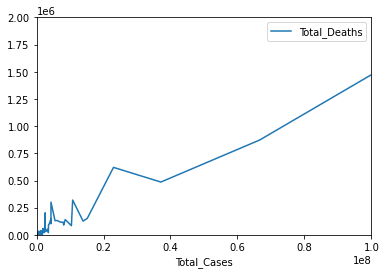

In [24]:
df_covid.plot(y='Total_Deaths',x='Total_Cases')
plt.ylim(0,2e+6)
plt.xlim(0,1e+8)

# Read a Text File in Pandas

In [25]:
df_panth = pd.read_csv ('/content/drive/My Drive/Colab_Notebooks/Text_Files/Pantheon_1048_Full.txt',sep=" ")
df_panth

,#zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor,Unnamed: 18
0,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1.30500,1.30500,0.0,25.26420,0.23500,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1044,0.93500,0.93500,0.0,24.26660,0.16580,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1045,1.01400,1.01400,0.0,24.85445,0.22910,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1046,1.31500,1.31500,0.0,25.54235,0.19870,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [26]:
df_panth['mb']

0       22.93445
1       22.88020
2       24.03770
3       24.34685
4       24.36050
          ...   
1043    25.26420
1044    24.26660
1045    24.85445
1046    25.54235
1047    24.63835
Name: mb, Length: 1048, dtype: float64

### Skip rows and Columns

In [27]:
df_panth = pd.read_csv ('/content/drive/My Drive/Colab_Notebooks/Text_Files/Pantheon_1048_Full.txt',sep=" ",usecols=range(5))
df_panth

,#zcmb,zhel,dz,mb,dmb
0,0.50309,0.50309,0.0,22.93445,0.12605
1,0.49480,0.49480,0.0,22.88020,0.11765
2,0.67767,0.67767,0.0,24.03770,0.20560
3,0.86650,0.86650,0.0,24.34685,0.17385
4,0.79857,0.79857,0.0,24.36050,0.17435
...,...,...,...,...,...
1043,1.30500,1.30500,0.0,25.26420,0.23500
1044,0.93500,0.93500,0.0,24.26660,0.16580
1045,1.01400,1.01400,0.0,24.85445,0.22910
1046,1.31500,1.31500,0.0,25.54235,0.19870


In [28]:
df_panth_dz=df_panth.loc[:, df_panth.columns!='dz']
df_panth_dz

,#zcmb,zhel,mb,dmb
0,0.50309,0.50309,22.93445,0.12605
1,0.49480,0.49480,22.88020,0.11765
2,0.67767,0.67767,24.03770,0.20560
3,0.86650,0.86650,24.34685,0.17385
4,0.79857,0.79857,24.36050,0.17435
...,...,...,...,...
1043,1.30500,1.30500,25.26420,0.23500
1044,0.93500,0.93500,24.26660,0.16580
1045,1.01400,1.01400,24.85445,0.22910
1046,1.31500,1.31500,25.54235,0.19870


In [29]:
df_panth_zhel_dz=df_panth.loc[:, ~df_panth.columns.isin(['zhel', 'dz'])]
df_panth_zhel_dz

,#zcmb,mb,dmb
0,0.50309,22.93445,0.12605
1,0.49480,22.88020,0.11765
2,0.67767,24.03770,0.20560
3,0.86650,24.34685,0.17385
4,0.79857,24.36050,0.17435
...,...,...,...
1043,1.30500,25.26420,0.23500
1044,0.93500,24.26660,0.16580
1045,1.01400,24.85445,0.22910
1046,1.31500,25.54235,0.19870


In [30]:
df_panth_short=df_panth.sort_values('#zcmb')
z_panth_ass=df_panth_short['#zcmb']
m_panth_ass=df_panth_short['mb']
sig_m_panth_ass=df_panth_short['dmb']

<ErrorbarContainer object of 3 artists>

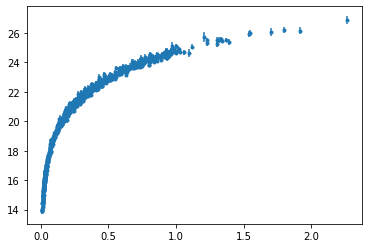

In [31]:
plt.errorbar(z_panth_ass,m_panth_ass,sig_m_panth_ass,fmt='.')